<a href="https://colab.research.google.com/github/lmgrj/Data-Science/blob/main/Introduction%20%C3%A0%20la%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Master Informatique Specialités EID2 (DD avec WISD)</h1></center>


---


<center><h2>Traitement numérique des données</h2></center>


---
<center><h2>TP3: Introduction à la classification</h2></center>


---
<center><h2>By : Lamgarraj Mohamed</h2></center>


In [ ]:
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Nous pouvons charger les données iris de Sklean comme suite:

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

comme nous pouvons les chargées de seaborn:

In [ ]:
iris = sns.load_dataset("iris")

découvrir iris dataset:

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Visualiser les données iris:**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


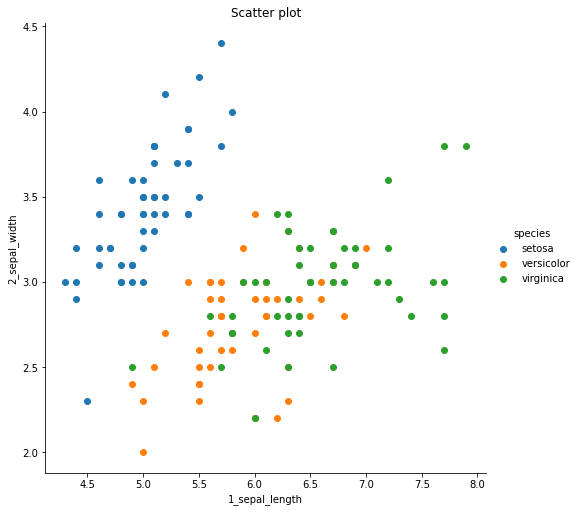

In [ ]:
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

##Part1: Plus Proche Voisin (NN/KNN)

**Travail demandé:**

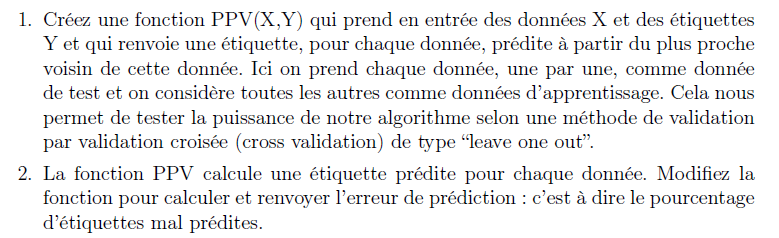

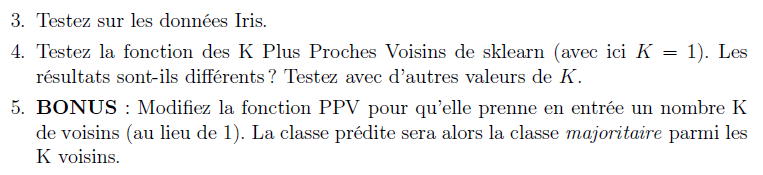

In [ ]:
def PPV(X, y, k=1):
    targets = np.zeros(len(X))
    for i in range(len(X)):
        X_test = X[i]
        X_train = np.delete(X, i, 0)
        l = np.array(metrics.pairwise.euclidean_distances(X_train, [X_test])).flatten()
        indexs = np.argsort(l)[:k]
        cs = []
        for j in range(k): cs.append(y[indexs[j]])
        c = np.bincount(cs).argmax()
        targets[i] = c
    error = 1 - metrics.accuracy_score(targets, y)
    return targets, error

In [ ]:
pred, error = PPV(X,y, k=10)# changer le k pour changer la taille de voisinage
print(f"erreur de classification = {round(error, 2)*100} %")
print(pred)

erreur de classification = 2.0 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


## Part2: Naive bayes classifier

**Travail demandé:**

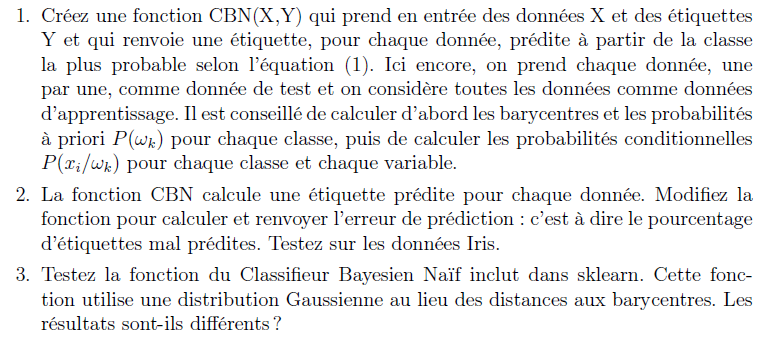

In [ ]:
def separate_by_class(X,y):
    d = {}
    for i in range(len(X)):
        if y[i] not in d:
            d[y[i]] = list()
        d[y[i]].append(list(X[i]))
    return d

In [ ]:
def probabilite_class(y):
    classes = np.unique(y)
    probs = {}
    for c in classes:
        probs[c] = list(y).count(c)/len(y)
    return probs
probabilite_class(y)

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}

In [ ]:
def barycenter_class(X,y):
    classes = np.unique(y)
    sep = separate_by_class(X,y)
    barycenters = {}
    for c in classes:
        barycenters[c] = np.array(sep[c]).mean(0)
    return barycenters
barycenter_class(X,y)

{0: array([5.006, 3.428, 1.462, 0.246]),
 1: array([5.936, 2.77 , 4.26 , 1.326]),
 2: array([6.588, 2.974, 5.552, 2.026])}

In [ ]:
def CBN(X, y):
    targets = np.zeros(len(X))
    for i in range(len(y)):
        X_test = X[i]; X_train = np.delete(X, i, 0)
        y_test = y[i]; y_train = np.delete(y, i)
        classes = np.unique(y_train)
        #calcule des P(Wk) probabilités de chaque classe k 
        probabilites = probabilite_class(y_train)
        #calcule des barycentres de chaque classe k
        barycentres = barycenter_class(X_train, y_train)   
        #calculer la probabilité conditionelle des valeurs des données sachant que la classe est connée
        distance = np.array([abs(X_test-b) for b in barycentres.values()])
        dist_total = np.sum(distance, axis=0)
        proba = abs(1-(distance/dist_total))
        produit = []
        j = 0
        for p in probabilites.values():
            produit.append(p*np.prod(proba[j]))
            j += 1
        targets[i] = np.argmax(np.array(produit))
    #l'erreur de classification    
    error = 1 - metrics.accuracy_score(targets, y)
    return targets, error

In [ ]:
pred, error = CBN(X,y)
print(f"error = {round(error, 2)*100} %")
print(pred)

error = 13.0 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2.]


In [ ]:
import sklearn.metrics
model = naive_bayes.GaussianNB()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=109)
model.fit(X_train, y_train)
pred = model.predict(X_test)
error = 1 - metrics.accuracy_score(pred, y_test)
print("******************* erreur*****************")
print(f"error = {round(error, 2)*100} %")
print("******************* prediction*****************")
print(pred)

******************* erreur*****************
error = 4.0 %
******************* prediction*****************
[2 1 2 0 2 1 0 2 1 2 2 0 1 0 0 0 1 1 0 1 1 0 2 0 0 2 2 1 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 0]


Dans cette nous allon visualiser les résultats de classification par Naive Bayes.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(10000,)
(100, 100)


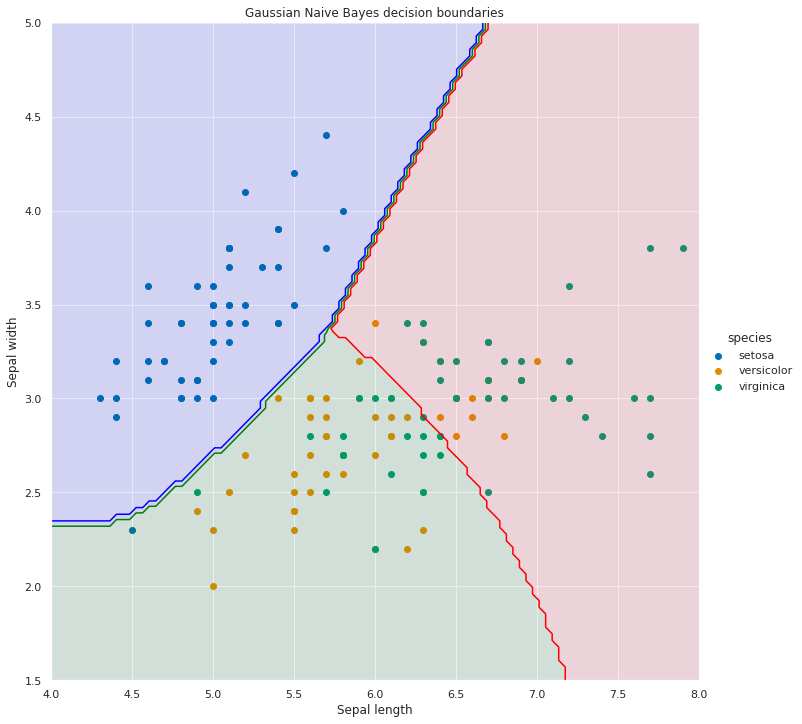

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
sns.set()
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes): #y a un pb à résoudre here mr lamggarj 
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax # i will try sepal ou lieu de petal
#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
print(zz.shape)
print(X.shape)
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

# **@author**

<h3> LAMGARRAJ Mohamed</h3>
USMBA_FSDM_FES ---> Master: Web Intelligence and Data Science(WISD)



USPN_Paris ---> Master: Exploration Informatique des Données et Décisionnel(EID2)



linkedin: https://www.linkedin.com/in/mohamed-lamgarraj-61b3341a3/

kaggle: https://www.kaggle.com/mohamedlamgarraj

github: https://github.com/lmgrj